In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp "/content/drive/MyDrive/TwiBot-20/Twibot-20.zip" "data.zip"
!unzip data.zip

Archive:  data.zip
   creating: Twibot-20/
  inflating: Twibot-20/dev.json      
  inflating: Twibot-20/LICENSE       
  inflating: Twibot-20/README.txt    
  inflating: Twibot-20/support.json  
  inflating: Twibot-20/test.json     
  inflating: Twibot-20/train.json    
  inflating: Twibot-20/TwiBot-20 Seed Users.txt  


In [3]:
import pandas as pd
import numpy as np
import random

In [4]:
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
train = pd.read_json('/content/Twibot-20/train.json')
test = pd.read_json('/content/Twibot-20/test.json')
#support = pd.read_json('/content/Twibot-20/support.json')
#dev = pd.read_json('/content/Twibot-20/dev.json')

In [6]:
dev = pd.read_json('/content/Twibot-20/dev.json')

In [7]:
train_tweet = train[['tweet', 'label']]
test_tweet = test[['tweet', 'label']]

In [8]:
dev_tweet = dev[['tweet', 'label']]

In [9]:
bots_train = train_tweet[train_tweet['label'] == 1].reset_index(drop = True)

In [10]:
genuine_train = train_tweet[train_tweet['label'] == 0].reset_index(drop = True)

In [11]:
bots_train

,tweet,label
0,None,1
1,[RT @VonteThePlug: Yeah but he ain’t got one h...,1
2,[https://t.co/KWnKV9F0fw\n],1
3,[RT @toadmeister: If the BBC is investing £100...,1
4,"[@BrightskinMacky 😂😂😂\n, Bone what??? 😂😂😂 RT @...",1
...,...,...
4641,[Love &amp; Entrepreneurship: Relationship The...,1
4642,[@C130Matt I think I heard a voice from out in...,1
4643,[@savage_esquire That's unfuckingbelievable.\n...,1
4644,[@Jomboy_ Doesn’t want to pull anymore Hammys\...,1


In [12]:
genuine_train

,tweet,label
0,[RT @CarnivalCruise: 🎉 Are you ready to see wh...,0
1,[RT @realDonaldTrump: THANK YOU #RNC2020! http...,0
2,[A family fears they may have been cheated out...,0
3,"[RT @elonmusk: Aloha, welcome back from space ...",0
4,[So amazing to see what @yael and @CitizenApp ...,0
...,...,...
3627,"[@JOHNSHIP99 @gunsnroses @Aerosmith It was.\n,...",0
3628,[I agree. Go home at sundown. No more rioting ...,0
3629,[@tomilahren imagine if Humayun Khan died in B...,0
3630,"[This #LaborDayWeekend, binge-watch the East S...",0


In [13]:
bots_train.dropna(how = 'any', axis = 0, inplace = True)
bots_train.reset_index(drop = True, inplace = True)

In [14]:
genuine_train.dropna(how = 'any', axis = 0, inplace = True)
genuine_train.reset_index(drop = True, inplace = True)

In [15]:
# bots_train_n_samples = pd.DataFrame()
# k = 0
# for i in range(len(bots_train['tweet'])):
#   l = bots_train['tweet'][i]
#   if l is not None:
#     lis = bots_train['tweet'][i]
#     for j in range(len(lis)):
#       text = lis[j]
#       bots_train_n_samples.loc[k, 'tweet'] = text
#       bots_train_n_samples.loc[k, 'label'] = 1
#       k += 1
# bots = bots_train_n_samples.copy()
bots_traincp = bots_train.copy()
genuine_traincp = genuine_train.copy()

In [16]:
# n_samples = 5
# k = 0
# bots_train_n_samples = pd.DataFrame()
# for i in range(len(bots_traincp['tweet'])):
#   l = bots_traincp['tweet'][i]
#   #print(l)
#   if l is not None:
#     if len(l) < n_samples:
#       lis = l
#     else:
#       lis = random.sample(l, n_samples)
#     for j in range(len(lis)):
#       text = lis[j]
#       bots_train_n_samples.loc[k, 'tweet'] = text
#       bots_train_n_samples.loc[k, 'label'] = 1
#       k += 1
bots_traincp.loc[:, 'tweet'] = ""
for i in range(len(bots_train['tweet'])):
  l = bots_train['tweet'][i]
  temp = ""
  for j in range(len(l)):
    text = l[j]
    temp = temp + text
  bots_traincp.loc[i, 'tweet'] = bots_traincp.loc[i, 'tweet'] + temp

In [17]:
# genuine_train_n_samplesn_n_samples = pd.DataFrame()
# k = 0
# for i in range(len(genuine_train['tweet'])):
#   l = genuine_train['tweet'][i]
#   if l is not None:
#     lis = genuine_train['tweet'][i]
#     for j in range(len(lis)):
#       text = lis[j]
#       genuine_train_n_samples.loc[k, 'tweet'] = text
#       genuine_train_n_samples.loc[k, 'label'] = 0
#       k += 1
# genuine = genuine_train_n_samples.copy()

In [18]:
# n_samples = 5
# k = 0
# genuine_train_n_samples = pd.DataFrame()
# for i in range(len(genuine_traincp['tweet'])):
#   l = genuine_traincp['tweet'][i]
#   #print(l)
#   if l is not None:
#     if len(l) < n_samples:
#       lis = l
#     else:
#       lis = random.sample(l, n_samples)
#     for j in range(len(lis)):
#       text = lis[j]
#       genuine_train_n_samples.loc[k, 'tweet'] = text
#       genuine_train_n_samples.loc[k, 'label'] = 1
#       k += 1
genuine_traincp.loc[:, 'tweet'] = ""
for i in range(len(genuine_train['tweet'])):
  l = genuine_train['tweet'][i]
  temp = ""
  for j in range(len(l)):
    text = l[j]
    temp = temp + text
  genuine_traincp.loc[i, 'tweet'] = genuine_traincp.loc[i, 'tweet'] + temp

In [19]:
bots_train_n_samples = bots_traincp.copy()
genuine_train_n_samples = genuine_traincp.copy()

In [20]:
def extract_hash_tags(s):
  return len(list(part[1:] for part in s.split() if part.startswith('#')))

In [21]:
bots_train_n_samples['no_of_hashtags'] = bots_train_n_samples['tweet'].apply(extract_hash_tags)

In [22]:
bots_train_n_samples

,tweet,label,no_of_hashtags
0,RT @VonteThePlug: Yeah but he ain’t got one ha...,1,6
1,https://t.co/KWnKV9F0fw\n,1,0
2,RT @toadmeister: If the BBC is investing £100 ...,1,33
3,@BrightskinMacky 😂😂😂\nBone what??? 😂😂😂 RT @sun...,1,16
4,"Milano pigliatutto. Dopo l’ex Banco Popolare, ...",1,124
...,...,...,...
4626,Love &amp; Entrepreneurship: Relationship Ther...,1,30
4627,@C130Matt I think I heard a voice from out in ...,1,8
4628,@savage_esquire That's unfuckingbelievable.\nI...,1,109
4629,@Jomboy_ Doesn’t want to pull anymore Hammys\n...,1,2


In [23]:
bots_train_n_samples['no_of_hashtags'].describe()

count    4631.000000
mean       78.993306
std       173.684091
min         0.000000
25%         7.000000
50%        27.000000
75%        81.000000
max      3124.000000
Name: no_of_hashtags, dtype: float64

In [24]:
bots_train_n_samples['no_of_hashtags'].value_counts()

0       352
1       163
2       145
3       131
5       108
       ... 
305       1
244       1
297       1
2771      1
1480      1
Name: no_of_hashtags, Length: 479, dtype: int64

In [25]:
bots_train_n_samples[bots_train_n_samples['no_of_hashtags'] == '28']

,tweet,label,no_of_hashtags


In [26]:
genuine_train_n_samples['no_of_hashtags'] = genuine_train_n_samples['tweet'].apply(extract_hash_tags)

In [27]:
genuine_train_n_samples['no_of_hashtags'].describe()

count    3592.000000
mean       62.427060
std       111.047802
min         0.000000
25%         6.000000
50%        25.000000
75%        76.000000
max      2430.000000
Name: no_of_hashtags, dtype: float64

In [28]:
genuine_train_n_samples['no_of_hashtags'].value_counts()

0      302
1      174
2      120
3       97
4       95
      ... 
174      1
220      1
329      1
360      1
594      1
Name: no_of_hashtags, Length: 359, dtype: int64

In [29]:
def getNoDuplicateHashtags(s):
  MyList = list(part[1:] for part in s.split() if part.startswith('#'))
  res = {}
  sum = 0
  for i in MyList:
    res[i] = MyList.count(i)
    sum += res[i]
  return len(res)

In [30]:
def getCountDuplicateHashtags(s):
  MyList = list(part[1:] for part in s.split() if part.startswith('#'))
  res = {}
  sum = 0
  for i in MyList:
    res[i] = MyList.count(i)
    sum += res[i]
  return len(res)

In [31]:
bots_train_n_samples['no_of_duplicate_hashtags'] = bots_train_n_samples['tweet'].apply(getNoDuplicateHashtags)
bots_train_n_samples['count_duplicate_hashtags'] = bots_train_n_samples['tweet'].apply(getCountDuplicateHashtags)

In [32]:
bots_train_n_samples

,tweet,label,no_of_hashtags,no_of_duplicate_hashtags,count_duplicate_hashtags
0,RT @VonteThePlug: Yeah but he ain’t got one ha...,1,6,5,5
1,https://t.co/KWnKV9F0fw\n,1,0,0,0
2,RT @toadmeister: If the BBC is investing £100 ...,1,33,30,30
3,@BrightskinMacky 😂😂😂\nBone what??? 😂😂😂 RT @sun...,1,16,16,16
4,"Milano pigliatutto. Dopo l’ex Banco Popolare, ...",1,124,117,117
...,...,...,...,...,...
4626,Love &amp; Entrepreneurship: Relationship Ther...,1,30,9,9
4627,@C130Matt I think I heard a voice from out in ...,1,8,6,6
4628,@savage_esquire That's unfuckingbelievable.\nI...,1,109,76,76
4629,@Jomboy_ Doesn’t want to pull anymore Hammys\n...,1,2,2,2


In [33]:
genuine_train_n_samples['no_of_duplicate_hashtags'] = genuine_train_n_samples['tweet'].apply(getNoDuplicateHashtags)
genuine_train_n_samples['count_duplicate_hashtags'] = genuine_train_n_samples['tweet'].apply(getCountDuplicateHashtags)

In [34]:
genuine_train_n_samples

,tweet,label,no_of_hashtags,no_of_duplicate_hashtags,count_duplicate_hashtags
0,RT @CarnivalCruise: 🎉 Are you ready to see wha...,0,152,106,106
1,RT @realDonaldTrump: THANK YOU #RNC2020! https...,0,36,26,26
2,A family fears they may have been cheated out ...,0,60,33,33
3,"RT @elonmusk: Aloha, welcome back from space 💫...",0,9,3,3
4,So amazing to see what @yael and @CitizenApp a...,0,84,41,41
...,...,...,...,...,...
3587,@JOHNSHIP99 @gunsnroses @Aerosmith It was.\nRT...,0,74,60,60
3588,I agree. Go home at sundown. No more rioting a...,0,20,19,19
3589,@tomilahren imagine if Humayun Khan died in Be...,0,34,31,31
3590,"This #LaborDayWeekend, binge-watch the East Si...",0,129,92,92


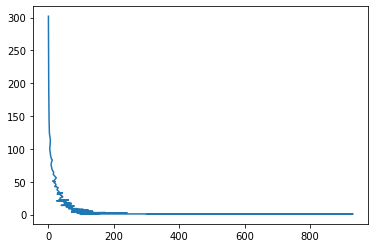

In [35]:
genuine_train_n_samples['no_of_duplicate_hashtags'].value_counts().plot()

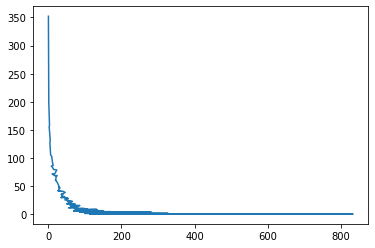

In [36]:
bots_train_n_samples['no_of_duplicate_hashtags'].value_counts().plot()

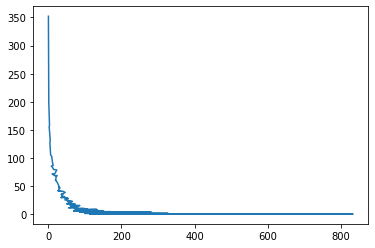

In [37]:
bots_train_n_samples['count_duplicate_hashtags'].value_counts().plot()

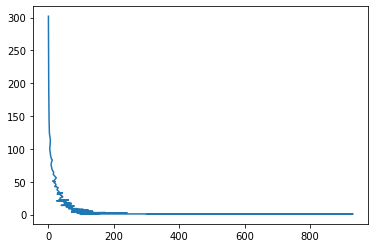

In [38]:
genuine_train_n_samples['count_duplicate_hashtags'].value_counts().plot()

In [39]:
emoji_regex = re.compile('[#*0-9]️⃣|[©®‼⁉™ℹ↔-↙↩↪⌚⌛⌨⏏⏩-⏳⏸-⏺Ⓜ▪▫▶◀◻-◾☀-☄☎☑☔☕☘]|☝[🏻-🏿]?|[☠☢☣☦☪☮☯☸-☺♀♂♈-♓♟♠♣♥♦♨♻♾♿⚒-⚗⚙⚛⚜⚠⚡⚪⚫⚰⚱⚽⚾⛄⛅⛈⛎⛏⛑⛓⛔⛩⛪⛰-⛵⛷⛸]|⛹(?:️‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[⛺⛽✂✅✈✉]|[✊-✍][🏻-🏿]?|[✏✒✔✖✝✡✨✳✴❄❇❌❎❓-❕❗❣❤➕-➗➡➰➿⤴⤵⬅-⬇⬛⬜⭐⭕〰〽㊗㊙🀄🃏🅰🅱🅾🅿🆎🆑-🆚]|🇦[🇨-🇬🇮🇱🇲🇴🇶-🇺🇼🇽🇿]|🇧[🇦🇧🇩-🇯🇱-🇴🇶-🇹🇻🇼🇾🇿]|🇨[🇦🇨🇩🇫-🇮🇰-🇵🇷🇺-🇿]|🇩[🇪🇬🇯🇰🇲🇴🇿]|🇪[🇦🇨🇪🇬🇭🇷-🇺]|🇫[🇮-🇰🇲🇴🇷]|🇬[🇦🇧🇩-🇮🇱-🇳🇵-🇺🇼🇾]|🇭[🇰🇲🇳🇷🇹🇺]|🇮[🇨-🇪🇱-🇴🇶-🇹]|🇯[🇪🇲🇴🇵]|🇰[🇪🇬-🇮🇲🇳🇵🇷🇼🇾🇿]|🇱[🇦-🇨🇮🇰🇷-🇻🇾]|🇲[🇦🇨-🇭🇰-🇿]|🇳[🇦🇨🇪-🇬🇮🇱🇴🇵🇷🇺🇿]|🇴🇲|🇵[🇦🇪-🇭🇰-🇳🇷-🇹🇼🇾]|🇶🇦|🇷[🇪🇴🇸🇺🇼]|🇸[🇦-🇪🇬-🇴🇷-🇹🇻🇽-🇿]|🇹[🇦🇨🇩🇫-🇭🇯-🇴🇷🇹🇻🇼🇿]|🇺[🇦🇬🇲🇳🇸🇾🇿]|🇻[🇦🇨🇪🇬🇮🇳🇺]|🇼[🇫🇸]|🇽🇰|🇾[🇪🇹]|🇿[🇦🇲🇼]|[🈁🈂🈚🈯🈲-🈺🉐🉑🌀-🌡🌤-🎄]|🎅[🏻-🏿]?|[🎆-🎓🎖🎗🎙-🎛🎞-🏁]|🏂[🏻-🏿]?|[🏃🏄](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🏅🏆]|🏇[🏻-🏿]?|[🏈🏉]|🏊(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🏋🏌](?:️‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🏍-🏰]|🏳(?:️‍🌈)?|🏴(?:‍☠️|󠁧󠁢(?:󠁥󠁮󠁧|󠁳󠁣󠁴|󠁷󠁬󠁳)󠁿)?|[🏵🏷-👀]|👁(?:️‍🗨️)?|[👂👃][🏻-🏿]?|[👄👅]|[👆-👐][🏻-🏿]?|[👑-👥]|[👦👧][🏻-🏿]?|👨(?:‍(?:[⚕⚖✈]️|❤️‍(?:💋‍)?👨|[🌾🍳🎓🎤🎨🏫🏭]|👦(?:‍👦)?|👧(?:‍[👦👧])?|[👨👩]‍(?:👦(?:‍👦)?|👧(?:‍[👦👧])?)|[💻💼🔧🔬🚀🚒🦰-🦳])|[🏻-🏿](?:‍(?:[⚕⚖✈]️|[🌾🍳🎓🎤🎨🏫🏭💻💼🔧🔬🚀🚒🦰-🦳]))?)?|👩(?:‍(?:[⚕⚖✈]️|❤️‍(?:💋‍)?[👨👩]|[🌾🍳🎓🎤🎨🏫🏭]|👦(?:‍👦)?|👧(?:‍[👦👧])?|👩‍(?:👦(?:‍👦)?|👧(?:‍[👦👧])?)|[💻💼🔧🔬🚀🚒🦰-🦳])|[🏻-🏿](?:‍(?:[⚕⚖✈]️|[🌾🍳🎓🎤🎨🏫🏭💻💼🔧🔬🚀🚒🦰-🦳]))?)?|[👪-👭]|👮(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|👯(?:‍[♀♂]️)?|👰[🏻-🏿]?|👱(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|👲[🏻-🏿]?|👳(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[👴-👶][🏻-🏿]?|👷(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|👸[🏻-🏿]?|[👹-👻]|👼[🏻-🏿]?|[👽-💀]|[💁💂](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|💃[🏻-🏿]?|💄|💅[🏻-🏿]?|[💆💇](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[💈-💩]|💪[🏻-🏿]?|[💫-📽📿-🔽🕉-🕎🕐-🕧🕯🕰🕳]|🕴[🏻-🏿]?|🕵(?:️‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🕶-🕹]|🕺[🏻-🏿]?|[🖇🖊-🖍]|[🖐🖕🖖][🏻-🏿]?|[🖤🖥🖨🖱🖲🖼🗂-🗄🗑-🗓🗜-🗞🗡🗣🗨🗯🗳🗺-🙄]|[🙅-🙇](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🙈-🙊]|🙋(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|🙌[🏻-🏿]?|[🙍🙎](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|🙏[🏻-🏿]?|[🚀-🚢]|🚣(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🚤-🚳]|[🚴-🚶](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🚷-🚿]|🛀[🏻-🏿]?|[🛁-🛅🛋]|🛌[🏻-🏿]?|[🛍-🛒🛠-🛥🛩🛫🛬🛰🛳-🛹🤐-🤗]|[🤘-🤜][🏻-🏿]?|🤝|[🤞🤟][🏻-🏿]?|[🤠-🤥]|🤦(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🤧-🤯]|[🤰-🤶][🏻-🏿]?|🤷(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🤸🤹](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|🤺|🤼(?:‍[♀♂]️)?|[🤽🤾](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🥀-🥅🥇-🥰🥳-🥶🥺🥼-🦢🦰-🦴]|[🦵🦶][🏻-🏿]?|🦷|[🦸🦹](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🧀-🧂🧐]|[🧑-🧕][🏻-🏿]?|🧖(?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🧗-🧝](?:‍[♀♂]️|[🏻-🏿](?:‍[♀♂]️)?)?|[🧞🧟](?:‍[♀♂]️)?|[🧠-🧿]')
def getNoOfEmojis(s):
  return len(re.findall(emoji_regex, s))

In [40]:
bots_train_n_samples['no_of_emojis'] = bots_train_n_samples['tweet'].apply(getNoOfEmojis)

In [41]:
bots_train_n_samples

,tweet,label,no_of_hashtags,no_of_duplicate_hashtags,count_duplicate_hashtags,no_of_emojis
0,RT @VonteThePlug: Yeah but he ain’t got one ha...,1,6,5,5,108
1,https://t.co/KWnKV9F0fw\n,1,0,0,0,0
2,RT @toadmeister: If the BBC is investing £100 ...,1,33,30,30,21
3,@BrightskinMacky 😂😂😂\nBone what??? 😂😂😂 RT @sun...,1,16,16,16,93
4,"Milano pigliatutto. Dopo l’ex Banco Popolare, ...",1,124,117,117,16
...,...,...,...,...,...,...
4626,Love &amp; Entrepreneurship: Relationship Ther...,1,30,9,9,22
4627,@C130Matt I think I heard a voice from out in ...,1,8,6,6,1
4628,@savage_esquire That's unfuckingbelievable.\nI...,1,109,76,76,51
4629,@Jomboy_ Doesn’t want to pull anymore Hammys\n...,1,2,2,2,23


In [42]:
genuine_train_n_samples['no_of_emojis'] = genuine_train_n_samples['tweet'].apply(getNoOfEmojis)

In [43]:
genuine_train_n_samples

,tweet,label,no_of_hashtags,no_of_duplicate_hashtags,count_duplicate_hashtags,no_of_emojis
0,RT @CarnivalCruise: 🎉 Are you ready to see wha...,0,152,106,106,73
1,RT @realDonaldTrump: THANK YOU #RNC2020! https...,0,36,26,26,69
2,A family fears they may have been cheated out ...,0,60,33,33,28
3,"RT @elonmusk: Aloha, welcome back from space 💫...",0,9,3,3,8
4,So amazing to see what @yael and @CitizenApp a...,0,84,41,41,11
...,...,...,...,...,...,...
3587,@JOHNSHIP99 @gunsnroses @Aerosmith It was.\nRT...,0,74,60,60,8
3588,I agree. Go home at sundown. No more rioting a...,0,20,19,19,21
3589,@tomilahren imagine if Humayun Khan died in Be...,0,34,31,31,7
3590,"This #LaborDayWeekend, binge-watch the East Si...",0,129,92,92,4


In [44]:
bots_train_n_samples['no_of_emojis'].value_counts()

0      704
1      183
2      136
3      121
4      101
      ... 
372      1
420      1
353      1
465      1
209      1
Name: no_of_emojis, Length: 364, dtype: int64

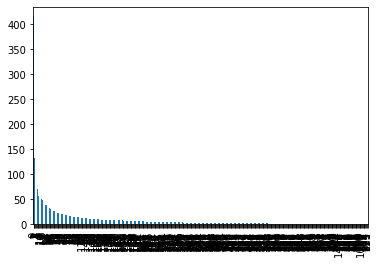

In [45]:
genuine_train_n_samples['no_of_emojis'].value_counts().plot(kind = 'bar')

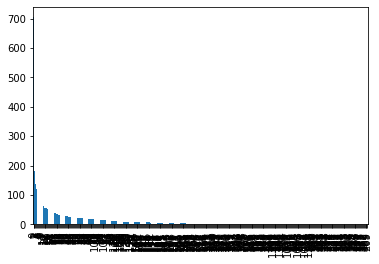

In [46]:
bots_train_n_samples['no_of_emojis'].value_counts().plot(kind = 'bar')

In [47]:
def getNoOfUrls(s):
  return len(re.findall(r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))", s))

In [48]:
bots_train_n_samples['no_of_urls'] = bots_train_n_samples['tweet'].apply(getNoOfUrls)
bots_train_n_samples

,tweet,label,no_of_hashtags,no_of_duplicate_hashtags,count_duplicate_hashtags,no_of_emojis,no_of_urls
0,RT @VonteThePlug: Yeah but he ain’t got one ha...,1,6,5,5,108,57
1,https://t.co/KWnKV9F0fw\n,1,0,0,0,0,1
2,RT @toadmeister: If the BBC is investing £100 ...,1,33,30,30,21,92
3,@BrightskinMacky 😂😂😂\nBone what??? 😂😂😂 RT @sun...,1,16,16,16,93,14
4,"Milano pigliatutto. Dopo l’ex Banco Popolare, ...",1,124,117,117,16,141
...,...,...,...,...,...,...,...
4626,Love &amp; Entrepreneurship: Relationship Ther...,1,30,9,9,22,161
4627,@C130Matt I think I heard a voice from out in ...,1,8,6,6,1,13
4628,@savage_esquire That's unfuckingbelievable.\nI...,1,109,76,76,51,73
4629,@Jomboy_ Doesn’t want to pull anymore Hammys\n...,1,2,2,2,23,4


In [49]:
genuine_train_n_samples['no_of_urls'] = genuine_train_n_samples['tweet'].apply(getNoOfUrls)
genuine_train_n_samples

,tweet,label,no_of_hashtags,no_of_duplicate_hashtags,count_duplicate_hashtags,no_of_emojis,no_of_urls
0,RT @CarnivalCruise: 🎉 Are you ready to see wha...,0,152,106,106,73,207
1,RT @realDonaldTrump: THANK YOU #RNC2020! https...,0,36,26,26,69,93
2,A family fears they may have been cheated out ...,0,60,33,33,28,173
3,"RT @elonmusk: Aloha, welcome back from space 💫...",0,9,3,3,8,178
4,So amazing to see what @yael and @CitizenApp a...,0,84,41,41,11,112
...,...,...,...,...,...,...,...
3587,@JOHNSHIP99 @gunsnroses @Aerosmith It was.\nRT...,0,74,60,60,8,75
3588,I agree. Go home at sundown. No more rioting a...,0,20,19,19,21,45
3589,@tomilahren imagine if Humayun Khan died in Be...,0,34,31,31,7,63
3590,"This #LaborDayWeekend, binge-watch the East Si...",0,129,92,92,4,236


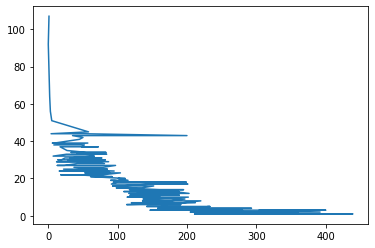

In [50]:
bots_train_n_samples['no_of_urls'].value_counts().plot()

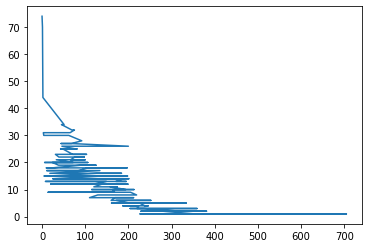

In [51]:
genuine_train_n_samples['no_of_urls'].value_counts().plot()